# Temporal Difference Methods
Temporal Difference (TD) learning is a combination of Dynamic Programming and Monte Carlo methods:
- Learning can be achieved from raw experience without knowing model dynamics
- Updates are made immediately when new observations (state an reward) arrive

TD learns the state-action value function $Q(s, a)$ while the policy can be as simple as ε-greedy. Two populat methods are SARSA and Q-Learning

### SARSA
Stands for $(S_{t}, A_{t}, R_{t+1}, S_{t+1}, A_{t+1})$ and in every move, it observes the action taken and next state and uses them to update the value function:  

$
Q(S_{t}, A_{t}) \leftarrow Q(S_{t}, A_{t}) + \alpha\left[R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_{t}, A_{t})\right]
$

This very simple update rule pushes $Q(S_{t}, A_{t})$ function a little closer to $R_{t+1} + \gamma Q(S_{t+1}, A_{t+1})$ since according to the immediately observed reward this is a more accurate value for $Q(S, A)$

### Q-Learning
Q-Learning follows a very similar rule but instead of relying to the current policy to observe the Q function of the next state and next action, it simply maximizes over the next action $A_{t+1}$:  

$
Q(S_{t}, A_{t}) \leftarrow Q(S_{t}, A_{t}) + \alpha\left[R_{t+1} + \gamma \max\limits_{a}Q(S_{t+1}, a) - Q(S_{t}, A_{t})\right]
$


In [1]:
%%html
<style>.container {width: 98%}</style>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../../")
from fromscratch.rl.mdp import GridWorld, CliffWalking, State, ActionSpace
from fromscratch.rl.policy import EpsilonGreedy
from fromscratch.rl.td_learning import SARSA, QLearning

### Grid World Environment

In [4]:
grid = GridWorld(7, 10, goal=[State([3, 7])])

### ε-greedy policy

In [5]:
policy = EpsilonGreedy(grid, epsilon=0.1, gamma=0.9, value_function="Q")

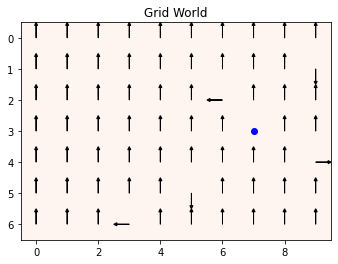

In [6]:
grid.plot(policy)

Initially the policy selects the first available action (north) since all actions have the same selection probability

### SARSA

In [18]:
sarsa = SARSA(grid, policy, lr=1)

In [19]:
sarsa.play_episodes(n=800)

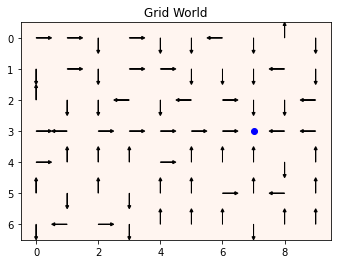

In [20]:
grid.plot(policy)

Text(0.5, 0, 'Episode')

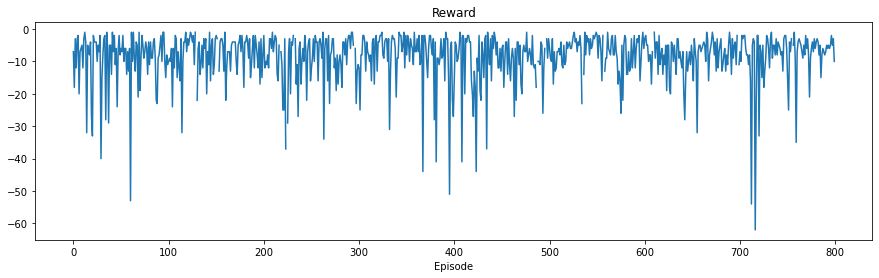

In [35]:
plt.figure(figsize=(15, 4))
plt.plot(sarsa.episode_reward)
plt.title("Reward")
plt.xlabel("Episode")

After 800 episodes the policy has learned a tendency to go towards the goal state. However in some states, the selected action is not optimal.

### Q-Learning

In [30]:
policy.reset()
qlearning = QLearning(grid, policy, lr=1)

In [31]:
qlearning.play_episodes(n=800)

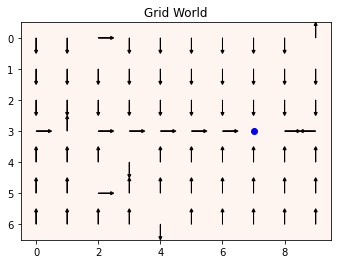

In [32]:
grid.plot(policy)

Text(0.5, 0, 'Episode')

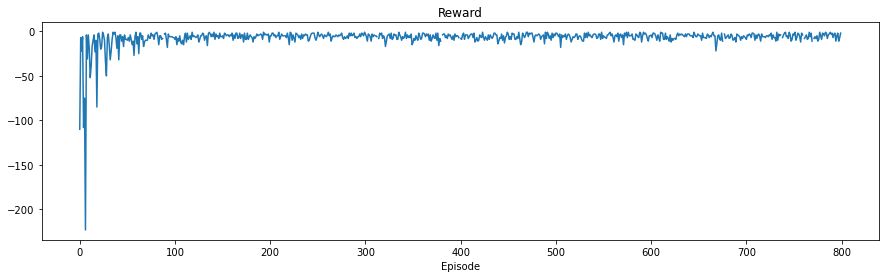

In [34]:
plt.figure(figsize=(15, 4))
plt.plot(qlearning.episode_reward)
plt.title("Reward")
plt.xlabel("Episode")

We see that Q-Learning converged better to the optimal Q function resulting in a much more consistent policy

### Windy Grid World
Let's test Q-Learning in a slightly different task. We also tune epsilon during training in order to favor exploitation

In [36]:
windy_grid = GridWorld(7, 10, goal=[State([3, 7])], wind=np.array([0, 0, 0, -1, -1, -1, -2, -2, -1, 0]))

In [45]:
policy = EpsilonGreedy(windy_grid, epsilon=0.1, gamma=0.9, value_function="Q")
qlearning = QLearning(windy_grid, policy, lr=1)

In [46]:
qlearning.play_episodes(n=800)
policy.epsilon = 0.01
qlearning.play_episodes(n=400)

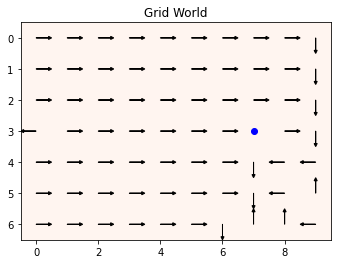

In [47]:
windy_grid.plot(policy)

Text(0.5, 0, 'Episode')

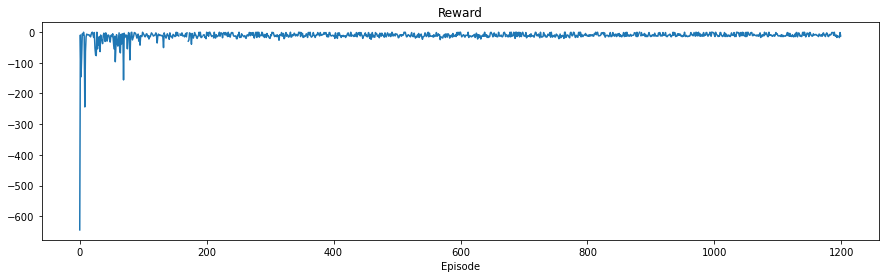

In [48]:
plt.figure(figsize=(15, 4))
plt.plot(qlearning.episode_reward)
plt.title("Reward")
plt.xlabel("Episode")

The policy again converged almost optimally

### Cliff Walking
This task shows the impact of using off-policy control instead of on-policy. This task is again on grid state-space but there are some states (cliff) that cause a very negative reward (-100) and move the agent back to the starting state.  

While Q-Learning learns the optimal (shortest distance), it passes just next to the cliff which can cause falling in it when using an explorative policy (ε-greedy).  

Sarsa, on the other hand, finds a safest (but longest) policy since it takes current actions into account.

In [67]:
cliff = CliffWalking(4, 12, goal=[State([3, 11])])
cliff.set_state(State([3, 0]))

In [119]:
policy = EpsilonGreedy(cliff, epsilon=0.1, gamma=0.99, value_function="Q")

In [120]:
sarsa = SARSA(cliff, policy, lr=0.1)

In [121]:
sarsa.play_episodes(n=500)

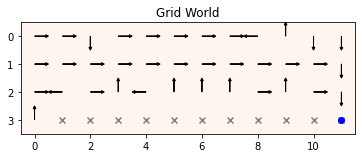

In [122]:
cliff.plot(policy)

SARSA learned to go upwards (safer states) when close to the cliff and then going to the right towards the goal.

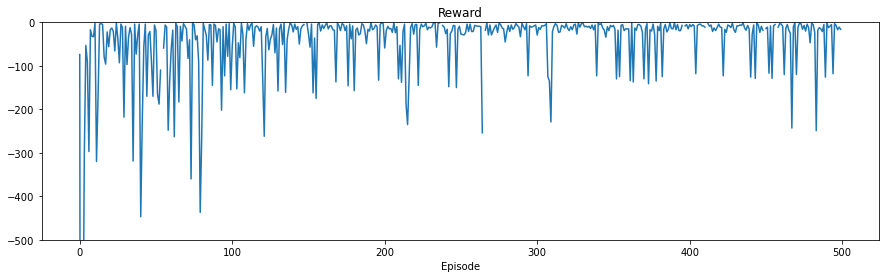

In [127]:
plt.figure(figsize=(15, 4))
plt.plot(sarsa.episode_reward)
plt.title("Reward")
plt.xlabel("Episode")
plt.ylim(-500, 0)
plt.show()

In [131]:
policy.reset()
qlearning = QLearning(cliff, policy, lr=1)

In [132]:
qlearning.play_episodes(n=500)

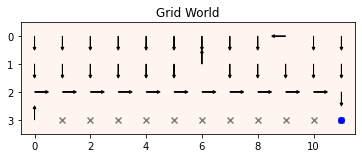

In [133]:
cliff.plot(policy)

Q-learning tends to go downwards close to the cliff because it followes the most rewarding path (shortest distance to the goal)

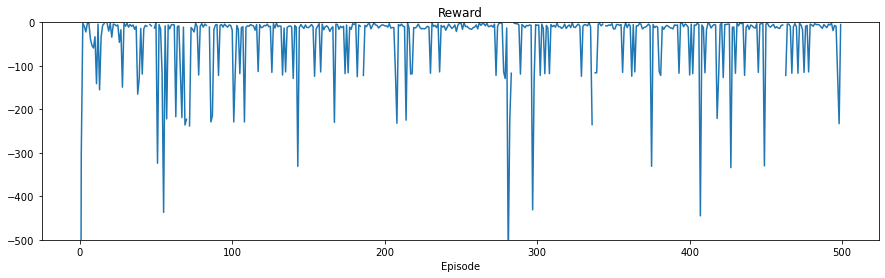

In [147]:
plt.figure(figsize=(15, 4))
plt.plot(qlearning.episode_reward)
plt.title("Reward")
plt.xlabel("Episode")
plt.ylim(-500, 0)
plt.show()